<a href="https://colab.research.google.com/github/dsogden/Quantitative_Finance/blob/main/Financial_TS_Exercises_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

## Exercise 1.1

In [30]:
tickers = ['AXP', 'CAT', 'SBUX']
assets = yf.download(tickers, start='1999-01-01', end='2008-12-31')['Close']
assets.head(10)

[*********************100%%**********************]  3 of 3 completed


Ticker,AXP,CAT,SBUX
Date,,,
1999-01-04,29.614317,23.68750,3.367188
1999-01-05,29.049019,23.62500,3.250000
1999-01-06,30.234322,24.25000,3.222656
1999-01-07,30.599030,24.46875,3.234375
1999-01-08,31.529036,25.50000,3.304688
1999-01-11,31.000208,26.50000,3.312500
1999-01-12,29.869614,25.31250,3.324219
1999-01-13,28.793722,24.03125,3.294922
1999-01-14,28.009600,23.37500,3.296875


In [31]:
# a)
returns = assets.pct_change()[1:]
sample_mean = returns.mean()
sample_std = returns.std()
skewness = stats.skew(returns)
kurtosis = stats.kurtosis(returns)
sample_min = returns.min()
sample_max = returns.max()

print(f'Sample mean: {sample_mean}\n')
print(f'Sample std: {sample_std}\n')
print(f'Sample skewness: {skewness}\n')
print(f'Sample kurtosis: {kurtosis}\n')
print(f'Sample min: {sample_min}\n')
print(f'Sample max: {sample_max}')

Sample mean: Ticker
AXP     0.000102
CAT     0.000482
SBUX    0.000492
dtype: float64

Sample std: Ticker
AXP     0.024459
CAT     0.021847
SBUX    0.026812
dtype: float64

Sample skewness: [-0.03530111  0.01592148 -0.08456841]

Sample kurtosis: [6.05922215 4.54305682 8.77754728]

Sample min: Ticker
AXP    -0.175949
CAT    -0.145175
SBUX   -0.282862
dtype: float64

Sample max: Ticker
AXP     0.179266
CAT     0.147229
SBUX    0.146354
dtype: float64


In [32]:
# b)
log_returns = np.log(1 + returns)
sample_mean = log_returns.mean()
sample_std = log_returns.std()
skewness = stats.skew(log_returns)
kurtosis = stats.kurtosis(log_returns)
sample_min = log_returns.min()
sample_max = log_returns.max()

print(f'Sample mean: {sample_mean}\n')
print(f'Sample std: {sample_std}\n')
print(f'Sample skewness: {skewness}\n')
print(f'Sample kurtosis: {kurtosis}\n')
print(f'Sample min: {sample_min}\n')
print(f'Sample max: {sample_max}')

Sample mean: Ticker
AXP    -0.000198
CAT     0.000243
SBUX    0.000131
dtype: float64

Sample std: Ticker
AXP     0.024527
CAT     0.021867
SBUX    0.026945
dtype: float64

Sample skewness: [-0.33736674 -0.2015048  -0.60036673]

Sample kurtosis: [ 6.49546707  4.76496115 12.94373145]

Sample min: Ticker
AXP    -0.193523
CAT    -0.156859
SBUX   -0.332487
dtype: float64

Sample max: Ticker
AXP     0.164892
CAT     0.137350
SBUX    0.136586
dtype: float64


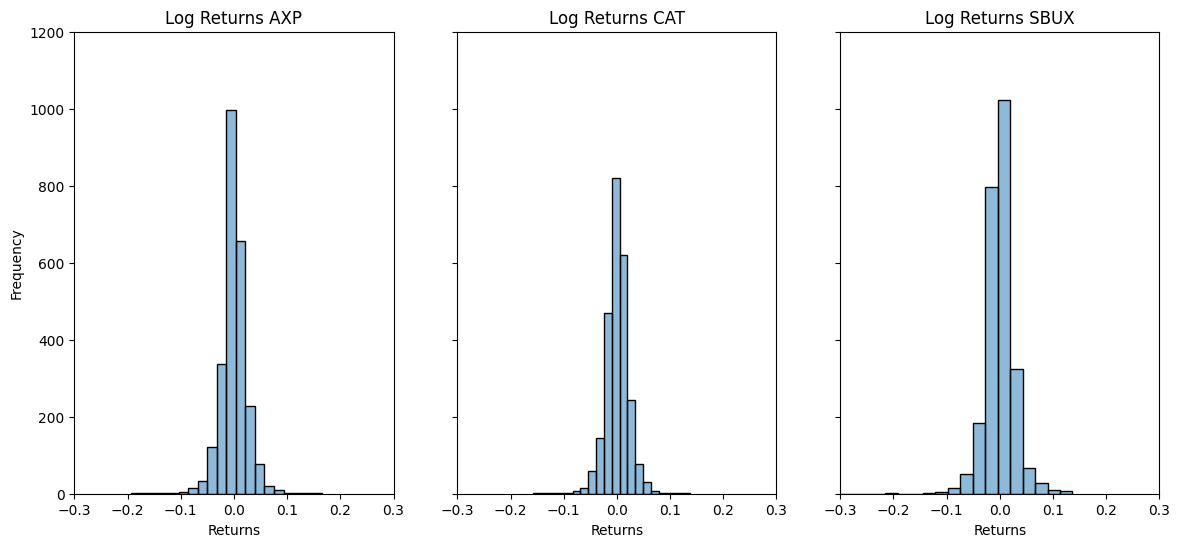

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(14, 6))
sns.histplot(log_returns['AXP'], bins=20, alpha=0.5, ax=ax[0], label='AXP')
sns.histplot(log_returns['CAT'], bins=20, alpha=0.5, ax=ax[1], label='CAT')
sns.histplot(log_returns['SBUX'], bins=20, alpha=0.5, ax=ax[2], label='SBUX')
ax[0].set(
    xlabel='Returns',
    ylabel='Frequency',
    xlim=[-0.3, 0.3],
    ylim=[0, 1200],
    title='Log Returns AXP'
)

ax[1].set(
    xlabel='Returns',
    xlim=[-0.3, 0.3],
    title='Log Returns CAT'
)

ax[2].set(
    xlabel='Returns',
    xlim=[-0.3, 0.3],
    title='Log Returns SBUX'
)
plt.show()

In [34]:
MU = 0.0
outputs_AXP = stats.ttest_1samp(log_returns['AXP'], MU)
outputs_CAT = stats.ttest_1samp(log_returns['CAT'], MU)
outputs_SBUX = stats.ttest_1samp(log_returns['SBUX'], MU)

alpha = 0.05
print(f'Significance value: {alpha}')
print(f'PValue: AXP: {outputs_AXP[1]}')
print(f'PValue: CAT: {outputs_CAT[1]}')
print(f'PValue: SBUX: {outputs_SBUX[1]}')

Significance value: 0.05
PValue: AXP: 0.6855592242744413
PValue: CAT: 0.577019507629168
PValue: SBUX: 0.8074601562507164


## Exercise 1.3

In [102]:
tickers = ['SPY']
spy = yf.download(tickers, start='1975-01-01', end='2008-12-31')['Close']
spy.head(10)

[*********************100%%**********************]  1 of 1 completed


Date
1993-01-29    43.93750
1993-02-01    44.25000
1993-02-02    44.34375
1993-02-03    44.81250
1993-02-04    45.00000
1993-02-05    44.96875
1993-02-08    44.96875
1993-02-09    44.65625
1993-02-10    44.71875
1993-02-11    44.93750
Name: Close, dtype: float64

In [39]:
spy.index = pd.to_datetime(spy.index)
# spy['year'] = spy.index.dt.year
# spy['returns'] = spy['Close'].pct_change()

In [43]:
spy = spy.reset_index()
spy['year'] = spy['Date'].dt.year
spy

,Date,Close,year
0,1993-01-29,43.937500,1993
1,1993-02-01,44.250000,1993
2,1993-02-02,44.343750,1993
3,1993-02-03,44.812500,1993
4,1993-02-04,45.000000,1993
...,...,...,...
4006,2008-12-23,86.160004,2008
4007,2008-12-24,86.660004,2008
4008,2008-12-26,87.160004,2008
4009,2008-12-29,86.910004,2008


In [44]:
spy['Returns'] = spy['Close'].pct_change()
spy = spy.rename(columns={'year': 'Year'})
spy.head(10)

,Date,Close,Year,Returns
0,1993-01-29,43.93750,1993,NaN
1,1993-02-01,44.25000,1993,0.007112
2,1993-02-02,44.34375,1993,0.002119
3,1993-02-03,44.81250,1993,0.010571
4,1993-02-04,45.00000,1993,0.004184
5,1993-02-05,44.96875,1993,-0.000694
6,1993-02-08,44.96875,1993,0.000000
7,1993-02-09,44.65625,1993,-0.006949
8,1993-02-10,44.71875,1993,0.001400
9,1993-02-11,44.93750,1993,0.004892


In [45]:
spy['Log_returns'] = np.log1p(spy['Returns'])
spy.head(10)

,Date,Close,Year,Returns,Log_returns
0,1993-01-29,43.93750,1993,NaN,NaN
1,1993-02-01,44.25000,1993,0.007112,0.007087
2,1993-02-02,44.34375,1993,0.002119,0.002116
3,1993-02-03,44.81250,1993,0.010571,0.010515
4,1993-02-04,45.00000,1993,0.004184,0.004175
5,1993-02-05,44.96875,1993,-0.000694,-0.000695
6,1993-02-08,44.96875,1993,0.000000,0.000000
7,1993-02-09,44.65625,1993,-0.006949,-0.006974
8,1993-02-10,44.71875,1993,0.001400,0.001399
9,1993-02-11,44.93750,1993,0.004892,0.004880


In [73]:
annual_log_returns = spy.groupby(['Year'])['Log_returns'].agg('mean')
print(f'Average annual log returns: {annual_log_returns.mean()}')

Average annual log returns: 0.0001751518323070209


In [101]:
n_shares = 1
initial_investment = spy['Close'][0] * n_shares
investment = initial_investment
for val in spy['Returns'][1:]:
    investment += val * investment
print(f'Initial Investment: {initial_investment:0.2f} // Date: {str(spy.Date[0])[:10]}')
print(f'Return: {investment:0.2f} // Date: {str(spy.Date.values[-1])[:10]}')

Initial Investment: 43.94 // Date: 1993-01-29
Return: 88.97 // Date: 2008-12-30


## Exercise 1.4

In [103]:
tickers = ['AXP']
axp = yf.download(tickers, start='1999-01-01', end='2008-12-31')['Close']
axp.head(10)

[*********************100%%**********************]  1 of 1 completed


Date
1999-01-04    29.614317
1999-01-05    29.049019
1999-01-06    30.234322
1999-01-07    30.599030
1999-01-08    31.529036
1999-01-11    31.000208
1999-01-12    29.869614
1999-01-13    28.793722
1999-01-14    28.009600
1999-01-15    30.453146
Name: Close, dtype: float64

In [105]:
axp_lreturns = np.log1p(axp.pct_change()[1:])
threshold = 0.0
kurtosis = stats.kurtosis(axp_lreturns)
skewness = stats.skew(axp_lreturns)

print(f'Kurtosis: {kurtosis}')
print(f'Skewness: {skewness}')

Kurtosis: 6.495467073845694
Skewness: -0.33736674375565096


In [109]:
alpha = 0.05
k_stat, pvalue = stats.kurtosistest(axp_lreturns)
if pvalue < alpha:
    print(f'Reject null hypothesis. Kurtosis is not zero')
else:
    print(f'Cannot reject null hypothesis. Kurtosis is equal to zero')

s_stat, pvalue = stats.skewtest(axp_lreturns)
if pvalue < alpha:
    print(f'Reject null hypothesis. Skewness is not zero')
else:
    print(f'Cannot reject null hypothesis. Skewness is equal to zero')

Reject null hypothesis. Kurtosis is not zero
Reject null hypothesis. Skewness is not zero
